## Cálculo da velocidade da luz usando Júpiter

In [2]:
#tabela
import pandas as pd
#constantes
from astropy import constants as const
#graficos
import matplotlib.pyplot as plt
#raiz, cos, sin, amostra de tempo e fit
from numpy import sqrt, cos, sin, linspace, polyfit, poly1d
#distancia
from  scipy.spatial.distance import euclidean as dist
%matplotlib inline

## Constantes

In [3]:
G = const.G.value #constante gravitacional
print('Constante gravitacional:', G, const.G.unit)

M_sol = const.M_sun.value #massa do Sol
print("Massa do Sol:", M_sol, const.M_sun.unit)

m_terra = const.M_earth.value #massa da Terra
print("Massa da Terra:", m_terra, const.M_earth.unit) 

m_jup = const.M_jup.value #massa de Jupiter
print("Massa de Júpiter:", m_jup, const.M_jup.unit)

d_terra = 1.496e11 #distancia entre a Terra e o Sol
print("Distância entre a Terra e o Sol:",  '%e' %d_terra, 'm')

d_jup = 7.785e11 #distancia entre Jupiter e o Sol
print("Distância entre Jupiter e o Sol:",  '%e' %d_jup, 'm')

r_sol = const.R_sun.value #raio do Sol
print("Raio do Sol:", '%e' %r_sol, const.R_sun.unit)

r_terra = const.R_earth.value #raio da Terra
print("Raio da Terra:", '%e' %r_terra, const.R_earth.unit)

r_jup = const.R_jup.value #raio de Jupiter
print("Raio de Júpiter:", '%e' %r_jup, const.R_jup.unit)

Constante gravitacional: 6.67384e-11 m3 / (kg s2)
Massa do Sol: 1.9891e+30 kg
Massa da Terra: 5.9742e+24 kg
Massa de Júpiter: 1.8987e+27 kg
Distância entre a Terra e o Sol: 1.496000e+11 m
Distância entre Jupiter e o Sol: 7.785000e+11 m
Raio do Sol: 6.955080e+08 m
Raio da Terra: 6.378136e+06 m
Raio de Júpiter: 7.149200e+07 m


## Costruindo o modelo

Por simplicidade, utilizamos dois planetas circulando em volta do sol, com uma força gravitacional tal que:
\begin{eqnarray}
F_{G} = G\frac{Mm}{r^2}
\end{eqnarray}
e
\begin{eqnarray}
a_{c}= \omega^2 r
\end{eqnarray}

onde $x_{p} = r_{p}cos(\omega_{p}t) $ e $y_{p} = r_{p}sen(\omega_{p}t) $

In [6]:
def w(r):
        
        w = sqrt(G*M_sol/r**3)
        return w

w_terra = w(d_terra)
        
w_jup = w(d_jup)

d = {'Velocidade Angular(rad/s)': [w_terra, w_jup], 'Distância do Sol(m)': [d_terra, d_jup], 'Massa(kg)': [m_terra, m_jup], 'Raio equatorial(m)': [r_terra, r_jup] }
pd.DataFrame(data = d, index = ('Terra', 'Jupiter'))

,Distância do Sol(m),Massa(kg),Raio equatorial(m),Velocidade Angular(rad/s)
Terra,1.496000e+11,5.974200e+24,6378136.0,1.991218e-07
Jupiter,7.785000e+11,1.898700e+27,71492000.0,1.677368e-08


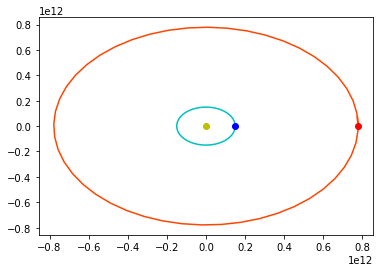

In [7]:
t_terra = linspace(0,32000000) # 1 translação da Terra 3,154e+7 segundos
t_jup = linspace(0,380000000) # 1 translação de Júpiter 3,743e+8 segundos

#terra
x_terra = d_terra*cos(w_terra*t_terra)
y_terra = d_terra*sin(w_terra*t_terra)

#jupiter
x_jup = d_jup*cos(w_jup*t_jup)
y_jup = d_jup*sin(w_jup*t_jup)

p_terra = list(map(lambda x,y:(x,y),x_terra,y_terra))
p_jup = list(map(lambda x,y:(x,y),x_jup,y_jup))


plt.plot(x_terra,y_terra, '-', color = 'c')
plt.plot(x_jup, y_jup, '-', color = 'orangered')
plt.plot(1,1, 'o', color = 'y') #sol
plt.plot(p_terra[0][0],p_terra[0][1], 'o', color = 'b') #terra
plt.plot(p_jup[0][0],p_jup[0][1], 'o', color = 'r') #jupiter


Agora, vamos plotar um raio de luz saindo de Jupiter em $(r_{jup},0)$ e chegando a Terra, demarcando os lugares que a mesma estava em $t_{0} = 0$ sendo o tempo em que o raio saiu de Jupiter e $t_{t} = t$ o tempo em que o raio chegou a Terra, utilizando a velocidade da luz $c = 1$ $ unidade/s$.

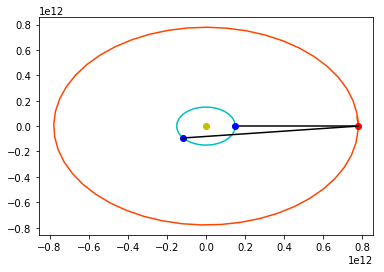

In [8]:
c = 1

#distancia
distancia0 = dist(p_terra[0],p_jup[0])

t_0 = 0
t_t = distancia0/c
#print(t_t)

novo_p_terra= (d_terra*cos(w_terra*(t_0+t_t)), d_terra*sin(w_terra*(t_0+t_t)))
novo_p_jup= (d_jup*cos(w_jup*(t_0+t_t)), d_jup*sin(w_jup*(t_0+t_t)))
#print(w_terra, w_terra*t_t)
#print(w_jup, w_jup*t_t)

plt.plot(x_terra,y_terra, '-', color = 'c')
plt.plot(x_jup, y_jup, '-', color = 'orangered')
plt.plot((p_terra[0][0], p_jup[0][0]),(p_terra[0][1], p_jup[0][1]), 'k')
plt.plot(p_terra[0][0],p_terra[0][1], 'o', color = 'b') #terra
plt.plot(p_jup[0][0],p_jup[0][1], 'o', color = 'r') #jupiter
plt.plot(0,0, 'o', color = 'y') #sol
plt.plot(novo_p_terra[0],novo_p_terra[1], 'o', color= 'b') #nova posicao terra
#plt.plot(novo_p_jup[0],novo_p_jup[1], 'o', color= 'r') #nova posicao jupiter
plt.plot((novo_p_terra[0], p_jup[0][0]),(novo_p_terra[1], p_jup[0][1]), color = 'k')


Para vários pontos, teremos o seguinte gráfico tempo que a luz demora para 'sair' de Jupiter e 'chegar' na Terra vs distância entre Jupiter e Terra:

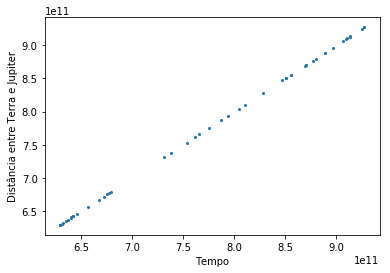

In [92]:
t_jup = linspace(0,380000000)


p_terra = list(map(lambda x,y:(x,y),x_terra,y_terra))
p_jup = list(map(lambda x,y:(x,y),x_jup,y_jup))

novo_p_terra = []
novo_p_jup = []
novo_x_terra = []
novo_y_terra = []
novo_x_jup = []
novo_y_jup = []

c = 1
for i in range(50): 
    distancia = dist(p_terra[i],p_jup[i])

    t_0 = t_terra[i]
    t_t = distancia/c
    
    novo_x_terra.append(d_terra*cos(w_terra*(t_0+t_t)))
    novo_y_terra.append(d_terra*sin(w_terra*(t_0+t_t)))
    
    novo_x_jup.append(d_jup*cos(w_jup*(t_0+t_t)))
    novo_y_jup.append(d_jup*sin(w_jup*(t_0+t_t)))
                      
novo_p_terra = list(map(lambda x,y:(x,y),novo_x_terra,novo_y_terra))
novo_p_jup = list(map(lambda x,y:(x,y),novo_x_jup,novo_y_jup))

distancia = []
tempo = []

for i in range(50):
    distancia.append(dist(novo_p_terra[i], novo_p_jup[i]))
    tempo.append(distancia[i]/c)
    
plt.plot(tempo, distancia, 'o', markersize = 2)
plt.ylabel('Distância entre Terra e Jupiter')
plt.xlabel('Tempo')

Vemos que há uma relação linear onde o coeficiente angular é m igual a um $ \frac{\Delta s}{\Delta t} $, no caso a velocidade da luz utilizada.

y(x) =   
1 x - 0.0003453


([], <a list of 0 Text yticklabel objects>)

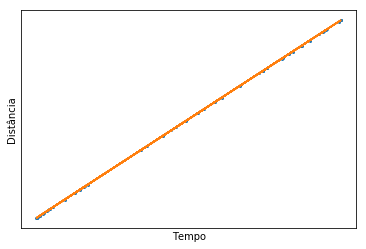

In [93]:
z = polyfit(tempo, distancia,1)

zf = poly1d(z)
print('y(x) = ',zf)

plt.plot(tempo, distancia, 'o', markersize = 2)
plt.plot(tempo, zf(tempo))
plt.ylabel('Distância')
plt.xlabel('Tempo')
plt.xticks([],[])
plt.yticks([],[])


O coeficiente angular será de fato o valor de c que ultilizamos. O jeito de achar q verdadeira velocidade da luz é sabendo o exato momento em que a luz saiu de Jupiter. Mas Ole Roemer relacionou dois tempos: um para quando a lua Io estava em eclipse, e outro quando ela não estava. Em uma dimensão, teremos o seguinte, sendo v o vetor da velocidade relativa entre Terra e Jupiter:

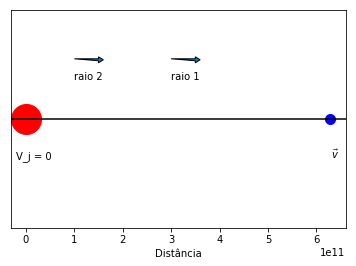

In [31]:
plt.plot(0,0, 'o', color = 'r', markersize = 30) #Jupiter
plt.plot(distancia0, 0, 'o', color = 'b', markersize = 10) #Terra
plt.axhline(0, color = 'k')
ax = plt.axes()
ax.arrow(1e11, 0.03, 0.5e11, 0,head_length = 1e10) #raio 2
plt.text(1e11, 0.02, 'raio 2')
ax.arrow(3e11, 0.03, 0.5e11, 0,head_length = 1e10) #raio 1
plt.text(3e11, 0.02, 'raio 1')
plt.yticks([],[])
plt.xlabel('Distância')
plt.text(-0.2e11,-0.02, 'V_j = 0')
plt.text(6.3e11, -0.02, r'$\vec v$')

Enquanto a Terra se movimenta, dois pulsos de luz, separados no tempo T são emitidos. No caso em que a Terra está se afastando de Jupiter, temos algo como:

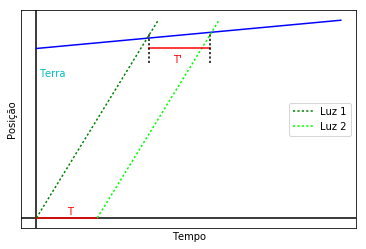

In [32]:
plt.axhline(0, color = 'k')
plt.axvline(0, color = 'k')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.xticks([],[])
plt.yticks([],[])
plt.text(0.01, 0.5, 'Terra', color = 'c')
plt.plot((0, 1),(0.6, 0.7), 'b')
plt.plot((0,0.2),(0,0), 'r')
plt.text(0.1, 0.01, 'T', color ='r')
plt.plot((0,0.4),(0, 0.7),':', label = 'Luz 1', color = 'g')
plt.plot((0.2,0.6),(0, 0.7), ':', label = 'Luz 2', color = 'lime')
plt.plot((0.37,0.57), (0.6,0.6), color = 'r')
plt.text(0.45, 0.55, "T'", color = 'r')
plt.plot((0.37,0.37),(0.55, 0.65), ':', color =  'k')
plt.plot((0.57,0.57),(0.55, 0.65), ':', color =  'k')
plt.legend()

Então, teremos o seguinte esquema onde $x_{L1} $ é a posição da luz 1,  $x_{L2} $ é a posição da luz 2, $c $ é a velocidade da luz, $x $ é a posição da Terra e $ v$ é a velocidade da Terra.
\begin{eqnarray}
x_{L1} = ct 
\\
x_{L2} = c(t-T) 
\\
x = x_{o} + vt
\end{eqnarray}
Com $t_{1}$ sendo o tempo em que a luz 1 encontra a Terra, $t_{2}$ o que a luz 2 encontra a Terra e $T' = t_{1} - t_{2}$.

Assim, chegamos à $ T' = \frac{T}{1- \frac{v}{c}}$ e, usando a expansão de Taylor para $\frac{v}{c}>>1$, $T' = T(1+\frac{v}{c})$.

Note que quando a Terra está se afastando de Júpiter, é necessário usar uma velocidade v negativa.


([], <a list of 0 Text yticklabel objects>)

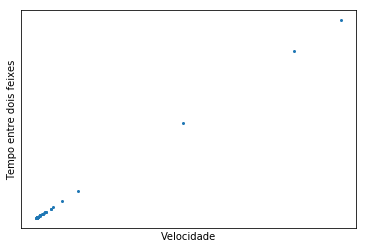

In [90]:
t_jup = linspace(0,380000000/2)

#terra
x_terra = d_terra*cos(w_terra*t_jup)
y_terra = d_terra*sin(w_terra*t_jup)

#jupiter
x_jup = d_jup*cos(w_jup*t_jup)
y_jup = d_jup*sin(w_jup*t_jup)

p_terra = list(map(lambda x,y:(x,y),x_terra,y_terra))
p_jup = list(map(lambda x,y:(x,y),x_jup,y_jup))

novo_p_terra = []
novo_p_jup = []
novo_x_terra = []
novo_y_terra = []
novo_x_jup = []
novo_y_jup = []

c = 1
periodo = 10

for i in range(50): 
    distancia = dist(p_terra[i],p_jup[i])

    t_0 = t_terra[i]
    t_t = distancia/c
    
    novo_x_terra.append(d_terra*cos(w_terra*(t_0+t_t)))
    novo_y_terra.append(d_terra*sin(w_terra*(t_0+t_t)))
    
    novo_x_jup.append(d_jup*cos(w_jup*(t_0+t_t)))
    novo_y_jup.append(d_jup*sin(w_jup*(t_0+t_t)))
                      
novo_p_terra = list(map(lambda x,y:(x,y),novo_x_terra,novo_y_terra))
novo_p_jup = list(map(lambda x,y:(x,y),novo_x_jup,novo_y_jup))

    
distancia = []
velocidade_r_x = []
velocidade_r_y = []

velocidade_r = []
tempo = []

for i in range(50):
    distancia.append(dist(novo_p_terra[i], novo_p_jup[i]))
    
for i in range(49):
    tempo.append(distancia[i]/c - distancia[i+1]/c)
    velocidade_r_x.append(x_terra[i]/tempo[i] - x_jup[i]/tempo[i])
    velocidade_r_y.append(y_terra[i]/tempo[i] - y_jup[i]/tempo[i])
    velocidade_r.append(sqrt(velocidade_r_x[i]**2 + velocidade_r_y[i]**2))
    
intervalo = []

for i in range(49):    
    intervalo.append(periodo*(1+velocidade_r[i]/c))

plt.plot(velocidade_r, intervalo, 'o', markersize = 2)
plt.ylabel('Tempo entre dois feixes')
plt.xlabel('Velocidade')
plt.xticks([],[])
plt.yticks([],[])


y(x) =   
1 x + 10


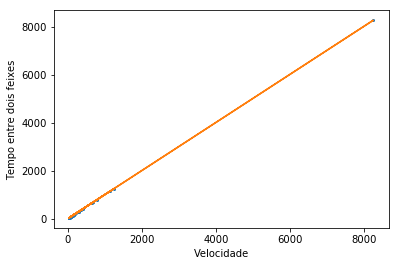

In [89]:
z = polyfit(velocidade_r, intervalo,1)

zf = poly1d(z)
print('y(x) = ',zf)

plt.plot(velocidade_r, intervalo, 'o', markersize = 2)
plt.plot(velocidade_r, zf(velocidade_r))
plt.xlabel('Velocidade')
plt.ylabel('Tempo entre dois feixes')

Onde o coeficiente angular m é o valor do período sobre a velocidade da luz, provando a linearidade da relação e nos provendo c.

Aqui tem uma animação modelando o que está acontecendo: https://trinket.io/glowscript/9f91fe7252

(***lembrar de corrigir o False da linha 34***)